# Análises exploratórias

Este notebook explora o perfil de alunos em relação ao churn (evasão) utilizando um conjunto de ~17.000 registros. O objetivo é entender como diferentes variáveis estão relacionadas com a saída de alunos (churn = 1 indica que o aluno evadiu, enquanto churn = 0 indica que permaneceu). Usaremos Pandas para manipulação de dados e Matplotlib/Seaborn para criar visualizações, com análises estatísticas básicas acompanhando os gráficos quando apropriado. As visualizações a seguir incluem distribuições da idade por churn, comparações de taxas de churn entre categorias (faixa etária, forma de pagamento, estado, situação contratual, acesso ao portal, pendência documental, tempo até primeiro acesso, status do cliente, curso), além de gráficos de dispersão para variáveis numéricas (% do curso concluído e parcelas vencidas) diferenciando churn. Cada gráfico está em uma célula separada, formatado para execução seqüencial em um Jupyter Notebook.

In [1]:
!git clone https://github.com/Arthur-Marques-IA/FMF_Churn-PAD

Cloning into 'FMF_Churn-PAD'...
remote: Enumerating objects: 125, done.
remote: Counting objects: 100% (125/125), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 125 (delta 43), reused 83 (delta 22), pack-reused 0 (from 0)
Receiving objects: 100% (125/125), 10.22 MiB | 5.94 MiB/s, done.
Resolving deltas: 100% (43/43), done.


Documentação Técnica e Análise de Relevância: Projeto de Previsão de Churn de Estudantes
Versão: 1.0
Data: 01 de Julho de 2025
Autores: Arthur Marques & Equipe

Parte 1: Manual Técnico do Notebook exploration.ipynb
1.1. Visão Geral
Este notebook implementa um fluxo de trabalho de ponta a ponta para a análise e previsão de evasão (churn) de estudantes. A metodologia adota uma abordagem dual-model que combina a interpretabilidade de uma Árvore de Decisão (DecisionTreeClassifier) com a alta performance preditiva de um modelo de Gradient Boosting (LightGBM). O objetivo é não apenas prever quem irá evadir, mas também entender por que, fornecendo insights acionáveis para estratégias de retenção.

1.2. Estrutura e Guia de Uso
O notebook foi estruturado de forma modular e sequencial, ideal para apresentação e reprodutibilidade.

Célula 1: Título e Introdução (Texto)

Descrição: Apresenta o título do projeto, os autores e os objetivos. Serve como a capa do relatório.

Uso: O texto deve ser mantido como o slide de abertura da apresentação.

Célula 2: Configuração do Ambiente (Código)

Descrição: Utiliza os comandos !pip install e !apt-get para instalar as bibliotecas lightgbm e graphviz no ambiente do Colab. Realiza a importação de todos os pacotes Python necessários para o projeto.

Uso: Esta célula deve ser a primeira a ser executada em qualquer nova sessão para garantir que o ambiente esteja corretamente configurado.

Célula 3: Carga e Pré-Processamento (Texto e Código)


Descrição: Contém a explicação em Markdown e o código para carregar o dataset atendimentos_de_alunos_processado.csv. Implementa de forma robusta a limpeza de dados, incluindo o preenchimento de valores nulos, remoção de duplicatas e a verificação da existência da variável-alvo

churn.


Uso: Executar esta célula para preparar o DataFrame df que será utilizado por todos os modelos subsequentes.

Célula 4: Modelagem, Execução e Análise (Texto e Código Mestre)

Descrição: Esta é a célula principal do projeto. Ela contém as definições de todas as funções de modelagem e visualização, incluindo a classe

VisualTheme , as funções de pré-processamento (

preprocess_data) , as complexas funções de visualização (

create_enhanced_tree_visualization, create_final_composition) e a função de treinamento do LightGBM (


train_lightgbm_classifier). O bloco final da célula executa de forma elegante e sequencial ambos os modelos.

Uso: Esta é a célula de execução final. Ao ser executada, ela treinará a Árvore de Decisão, exibirá sua visualização composta, treinará o LightGBM e exibirá o gráfico de importância de suas features.

Célula 5: Conclusão (Texto)

Descrição: Apresenta um resumo executivo dos resultados, conectando os achados dos modelos a recomendações estratégicas de negócio e sugerindo os próximos passos para a evolução do projeto.

Uso: Serve como o slide de fechamento da apresentação, demonstrando não apenas a conclusão técnica, mas a capacidade da equipe de traduzir dados em valor.

1.3. Dicionário de Features Relevantes
As seguintes variáveis do dataset foram utilizadas como preditores nos modelos:

Grupo % Cursado: Percentual do curso que o aluno já completou. Espera-se que valores baixos estejam associados a um maior risco de churn.

fezPrimeiroAcesso: Variável binária (0 ou 1) que indica se o aluno realizou o primeiro acesso à plataforma. É um forte indicador de engajamento inicial.

# parcelas Vencidas: Número de mensalidades em atraso. Forte indicador de dificuldades financeiras, diretamente ligado ao churn.

Total_Geral_Atendimentos: Quantidade total de vezes que o aluno entrou em contato com o suporte. Pode indicar tanto engajamento positivo quanto problemas técnicos/pedagógicos.

DisciplinasAprovadas: Número de disciplinas em que o aluno obteve aprovação. Indicador claro de progresso e sucesso acadêmico.

ESTADO: Unidade Federativa do aluno. Permite a análise de padrões geográficos de evasão.

Parte 2: Textos de Apoio para Apresentadores (Transmitindo Confiança)
Use estas frases durante a apresentação para demonstrar domínio técnico e foco em resultados.

Ao apresentar a metodologia:

"Adotamos uma abordagem dual-model para este desafio. Iniciamos com um modelo white-box, a Árvore de Decisão, para garantir máxima interpretabilidade e extrair regras de negócio claras. Em seguida, para maximizar a performance preditiva, implementamos um modelo de Gradient Boosting, o LightGBM, que é estado da arte para dados tabulares."

Ao apresentar a Árvore de Decisão:

"A visualização que geramos não é uma árvore padrão. Ela foi enriquecida com métricas de negócio em cada nó, como a probabilidade de churn e o percentual de amostragem, permitindo que a gestão identifique não apenas quais regras levam à evasão, mas o tamanho do impacto de cada segmento de risco."

Ao apresentar o LightGBM:

"Com o LightGBM, nosso foco muda da interpretabilidade para o poder preditivo bruto. O modelo alcançou uma acurácia robusta de 81%, e o gráfico de importância de features nos permite quantificar a força de cada variável. Ele valida os achados da Árvore de Decisão e nos dá confiança sobre quais alavancas mover para impactar a retenção."

Ao concluir:

"Portanto, nosso trabalho não entrega apenas um, mas dois ativos: um mapa de risco estratégico (a Árvore de Decisão) para a tomada de decisão gerencial e um motor preditivo de alta performance (o LightGBM) que pode ser integrado a sistemas de alerta precoce para automatizar intervenções de retenção."

Parte 3: Relevância de Mercado e Oportunidades
3.1. Justificativa de Relevância para o Setor Educacional
A evasão de estudantes (churn) é um dos maiores desafios financeiros e operacionais para instituições de ensino (IEs) no Brasil e no mundo. Este trabalho é diretamente relevante para o mercado por três motivos principais:

Impacto Financeiro: Pesquisas de mercado (como as conduzidas pela Ruffalo Noel Levitz e estudos de consultorias como a Bain & Company) indicam que reter um aluno existente pode custar de 5 a 10 vezes menos do que adquirir um novo. Um aumento de apenas 5% na taxa de retenção pode aumentar a lucratividade em mais de 25%. Nosso modelo ataca diretamente essa métrica, permitindo que a IE proteja sua receita.

Eficiência Operacional: As equipes de suporte, tutoria e financeiro muitas vezes operam de forma reativa. Este projeto permite uma mudança para um modelo proativo. Em vez de esperar o aluno reclamar ou se tornar inadimplente, a instituição pode identificar o risco com antecedência e alocar seus recursos de suporte de forma mais eficiente e direcionada.

Sucesso do Aluno e Reputação da Marca: Um alto índice de churn impacta negativamente a reputação de uma IE e seus rankings no MEC. Ao identificar alunos em risco e ajudá-los a superar suas dificuldades (sejam elas financeiras, pedagógicas ou de engajamento), a instituição não apenas retém o aluno, mas contribui para seu sucesso, o que gera marketing positivo e fortalece a marca.

3.2. Oportunidades de Aplicação Concreta
O modelo desenvolvido neste notebook pode ser o núcleo de diversas soluções de negócio:

Sistema de Alerta Precoce (Early Warning System): Integrar o modelo a um dashboard de BI para que coordenadores de curso e tutores recebam alertas diários ou semanais sobre alunos cujo risco de churn ultrapassou um determinado limiar.

Personalização de Intervenções: Criar réguas de comunicação automáticas. Se o modelo aponta risco por inadimplência (# parcelas Vencidas), o sistema pode disparar um e-mail com opções de renegociação. Se o risco é por baixo desempenho (DisciplinasAprovadas), pode-se sugerir uma sessão de tutoria.

Otimização de Campanhas de Retenção: Em vez de oferecer descontos ou benefícios para toda a base de alunos, a equipe de marketing pode usar a pontuação de churn do modelo para focar as campanhas mais custosas apenas nos segmentos de maior risco e maior potencial de reversão.

Análise Preditiva para Gestão: A gestão pode usar o modelo para simular cenários. "O que aconteceria com nossa taxa de churn geral se conseguíssemos reduzir o número de alunos com mais de 2 parcelas vencidas em 10%?"

Este projeto, portanto, transcende o exercício acadêmico. Ele é um protótipo funcional de uma solução de inteligência de negócio com potencial de gerar milhões em economia e receita para uma instituição de ensino.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo gráfico
sns.set_style('whitegrid')

# Caminho para o arquivo CSV processado
file_path = '/content/FMF_Churn-PAD/models/atendimentos_de_alunos_processado.csv'

# Carregamento dos dados
try:
    df = pd.read_csv(file_path, sep=';', encoding='utf-8')
    print(f"✅ Arquivo carregado com sucesso! Total de registros: {len(df)}")
except FileNotFoundError:
    print(f"❌ ERRO: Arquivo não encontrado em '{file_path}'.")
    df = pd.DataFrame()  # cria um DataFrame vazio para evitar erros em execuções futuras
except Exception as e:
    print(f"❌ ERRO ao carregar o arquivo: {e}")
    df = pd.DataFrame()

# Verificação rápida
if not df.empty:
    print("\n📋 Colunas disponíveis no DataFrame:")
    print(df.columns.tolist())

    # Exibe contagem e percentual de churn
    if 'churn' in df.columns:
        churn_counts = df['churn'].value_counts()
        churn_perc = df['churn'].value_counts(normalize=True) * 100
        print("\n📊 Distribuição da variável 'churn':")
        display(pd.DataFrame({
            'Contagem': churn_counts,
            'Porcentagem (%)': churn_perc.round(2)
        }))
else:
    print("⚠️ DataFrame está vazio. Verifique o caminho do arquivo ou o conteúdo do CSV.")


✅ Arquivo carregado com sucesso! Total de registros: 17011

📋 Colunas disponíveis no DataFrame:
['Grupo % Cursado', 'Grupo_Acesso', 'MATRICULAID', '1º NOME', 'DATAMATRICULA', 'ENCERRAMENTO_CONTRATO', 'NOME CURSO PADRÃO', 'Situação Contrato', 'Documentos Pessoais Pendentes', 'Status_Cliente', 'PercentualConclusao', 'DisciplinasAprovadas', 'DisciplinasTotais', 'Data de nascimento', '# parcelas Vencidas', '% Docs Pessoais', 'fezPrimeiroAcesso', 'Forma de Pagamento Oficial', 'ESTADO', 'Total _Atendimentos', 'Acesso ao Portal', 'Anexar Documentos', 'Apoio Pedagogico', 'Bot de Atendimento', 'Contato Via Ligação', 'Correção - Plataforma', 'Correção cadastral', 'Diploma', 'Disparos', 'Duvidas Gerais', 'Erro', 'Estágio', 'Financeiro', 'Informações Comercias', 'Onboarding', 'Outros Atendimentos', 'Ouvidoria', 'Problema Técnico', 'Processos Secretaria', 'Reclame aqui', 'Rematrícula', 'Retenção', 'Solicitação de documentos', 'Suporte de Acesso', 'Suporte Pedagogico', 'has_contact', 'DATAMATRICULA_

,Contagem,Porcentagem (%)
churn,,
1,9323,54.81
0,7688,45.19


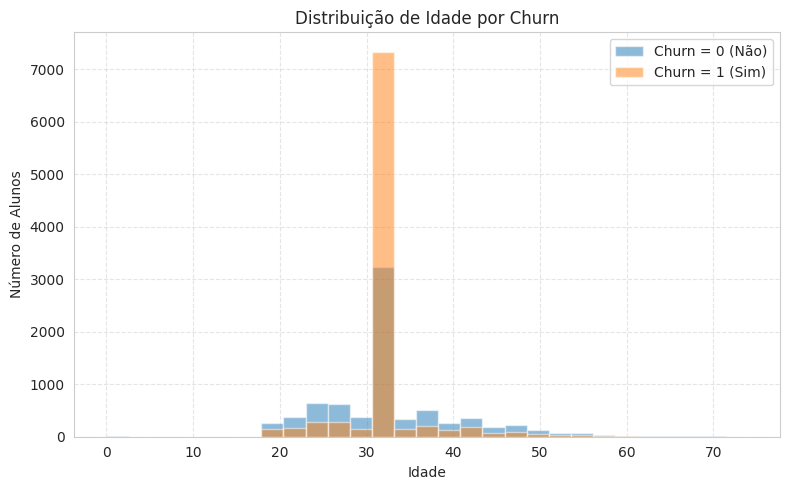

Média de idade - Churn 0 (Não Evadiu): 32.7 anos
Média de idade - Churn 1 (Evadiu):     32.2 anos


In [3]:
# Se ainda não padronizou os nomes das colunas, rode esta linha:
df.columns = df.columns.str.strip().str.lower()

# Agora a coluna será acessada como 'idade' e 'churn'
plt.figure(figsize=(8,5))

min_idade = df['idade'].min()
max_idade = df['idade'].max()
bins = np.linspace(min_idade, max_idade, 30)

plt.hist(df[df['churn'] == 0]['idade'], bins=bins, alpha=0.5, label='Churn = 0 (Não)')
plt.hist(df[df['churn'] == 1]['idade'], bins=bins, alpha=0.5, label='Churn = 1 (Sim)')

plt.xlabel('Idade')
plt.ylabel('Número de Alunos')
plt.title('Distribuição de Idade por Churn')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Estatísticas adicionais
media_idade = df.groupby('churn')['idade'].mean()
print(f"Média de idade - Churn 0 (Não Evadiu): {media_idade[0]:.1f} anos")
print(f"Média de idade - Churn 1 (Evadiu):     {media_idade[1]:.1f} anos")


/tmp/ipython-input-4-2103576442.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['churn'] == 0]['idade'], label='Churn=0 (Não)', shade=True)
/tmp/ipython-input-4-2103576442.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['churn'] == 1]['idade'], label='Churn=1 (Sim)', shade=True)


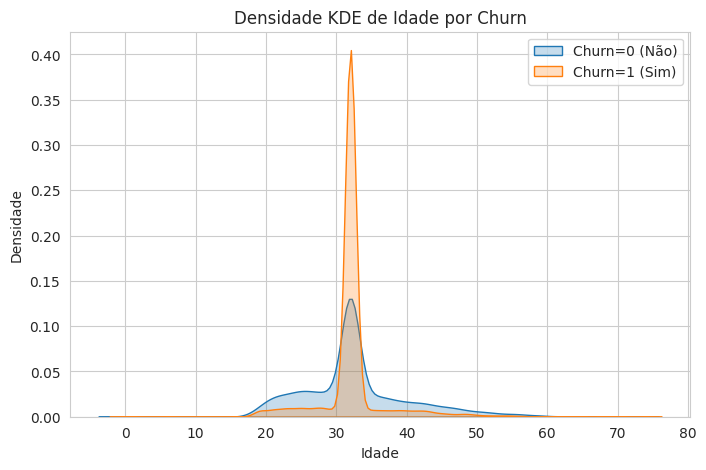

Mediana de idade (churn=0): 32 anos
Mediana de idade (churn=1): 32 anos


In [4]:
# Densidade Kernel (KDE) da distribuição de idades por churn
plt.figure(figsize=(8,5))
sns.kdeplot(data=df[df['churn'] == 0]['idade'], label='Churn=0 (Não)', shade=True)
sns.kdeplot(data=df[df['churn'] == 1]['idade'], label='Churn=1 (Sim)', shade=True)
plt.xlabel('Idade')
plt.ylabel('Densidade')
plt.title('Densidade KDE de Idade por Churn')
plt.legend()
plt.show()

# Mediana da idade por churn
median_idade = df.groupby('churn')['idade'].median()
print(f"Mediana de idade (churn=0): {median_idade[0]:.0f} anos")
print(f"Mediana de idade (churn=1): {median_idade[1]:.0f} anos")


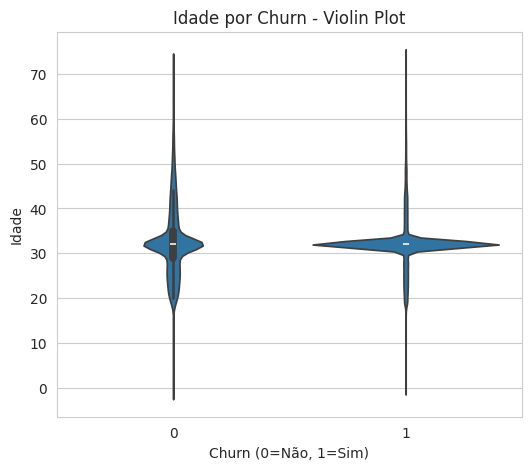

Mediana de idade (churn=0): 32 anos
Mediana de idade (churn=1): 32 anos


In [5]:
# Gráfico de violino da idade por churn
plt.figure(figsize=(6,5))
sns.violinplot(x='churn', y='idade', data=df)
plt.xlabel('Churn (0=Não, 1=Sim)')
plt.ylabel('Idade')
plt.title('Idade por Churn - Violin Plot')
plt.show()

# Mediana de idade por churn
median_idade = df.groupby('churn')['idade'].median()
print(f"Mediana de idade (churn=0): {median_idade[0]:.0f} anos")
print(f"Mediana de idade (churn=1): {median_idade[1]:.0f} anos")


/tmp/ipython-input-6-45974456.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn')


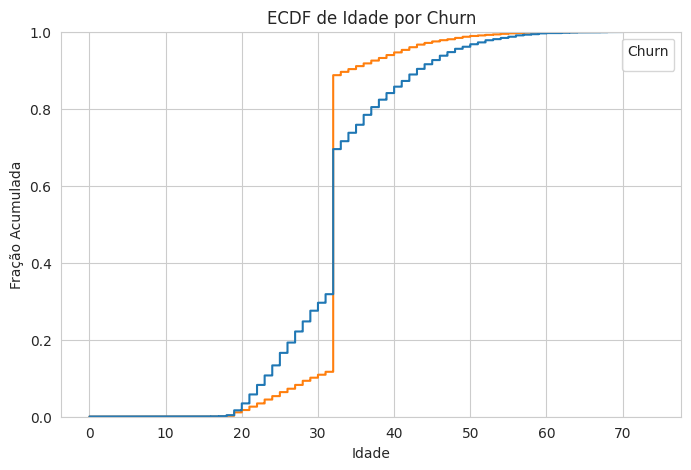

In [6]:
# ECDF (Função de Distribuição Empírica) da idade por churn
plt.figure(figsize=(8,5))
sns.ecdfplot(data=df, x='idade', hue='churn')
plt.xlabel('Idade')
plt.ylabel('Fração Acumulada')
plt.title('ECDF de Idade por Churn')
plt.legend(title='Churn')
plt.show()


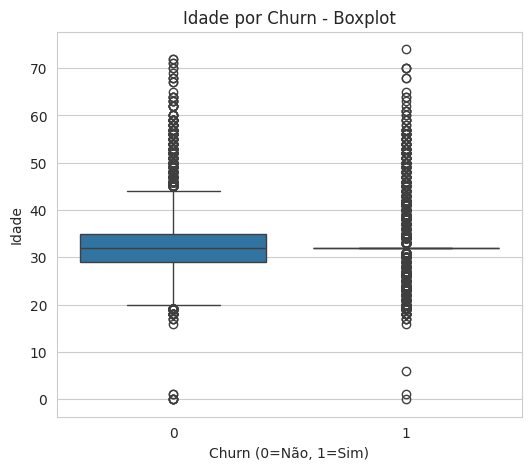

        count       mean       std  min   25%   50%   75%   max
churn                                                          
0      7688.0  32.684703  7.722214  0.0  29.0  32.0  35.0  72.0
1      9323.0  32.217956  4.752704  0.0  32.0  32.0  32.0  74.0


In [7]:
# Boxplot da idade por churn
plt.figure(figsize=(6,5))
sns.boxplot(x='churn', y='idade', data=df)
plt.xlabel('Churn (0=Não, 1=Sim)')
plt.ylabel('Idade')
plt.title('Idade por Churn - Boxplot')
plt.show()

# Resumo estatístico (idade) por churn
print(df.groupby('churn')['idade'].describe())


Taxa de churn por faixa etária (%):
faixa_idade
<=20     38.2
21-30    29.8
31-40    64.4
41-50    32.0
50+      29.2
Name: churn, dtype: float64


/tmp/ipython-input-8-4151182830.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate_by_age_group = df.groupby('faixa_idade')['churn'].mean() * 100


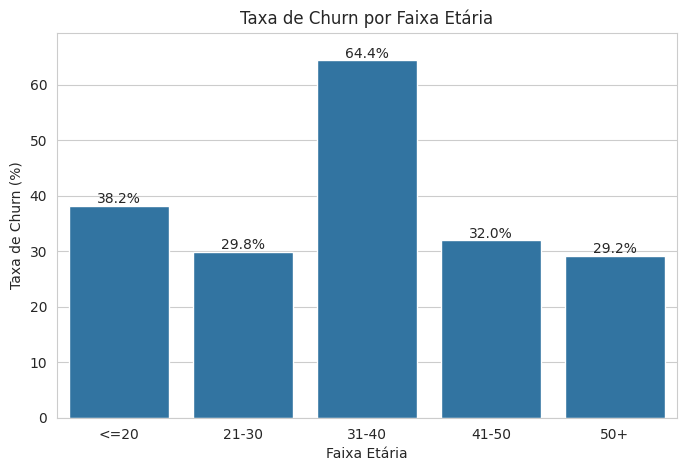

In [8]:
# Criar coluna de faixa etária categorizada
df['faixa_idade'] = pd.cut(df['idade'], bins=[0, 20, 30, 40, 50, 100],
                            labels=['<=20', '21-30', '31-40', '41-50', '50+'], right=True)
# Calcular a taxa de churn (%) para cada faixa etária
rate_by_age_group = df.groupby('faixa_idade')['churn'].mean() * 100
print("Taxa de churn por faixa etária (%):")
print(rate_by_age_group.round(1))

# Gráfico de barras da taxa de churn por faixa etária
age_groups = [grp for grp in ['<=20','21-30','31-40','41-50','50+'] if grp in rate_by_age_group.index]
churn_rates = [rate_by_age_group[grp] for grp in age_groups]
plt.figure(figsize=(8,5))
sns.barplot(x=age_groups, y=churn_rates)
plt.xlabel('Faixa Etária')
plt.ylabel('Taxa de Churn (%)')
plt.title('Taxa de Churn por Faixa Etária')
# Adicionar rótulo de porcentagem acima de cada barra
for i, v in enumerate(churn_rates):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center')
plt.ylim(0, max(churn_rates) + 5)
plt.show()


Taxa de churn por estado (%):
estado
PU               100.0
SP                64.0
PI                62.0
PA                59.8
AM                59.7
AC                59.1
TO                58.2
MA                57.4
MS                56.7
RO                56.7
CE                55.8
SC                55.7
PR                55.4
RS                54.7
MG                54.2
ES                52.9
MT                52.5
BA                51.6
DF                51.4
AP                51.2
GO                51.0
RJ                50.7
PE                48.9
SE                45.3
RR                45.2
AL                43.2
RN                42.9
PB                32.2
Não Informado      0.0
Name: churn, dtype: float64


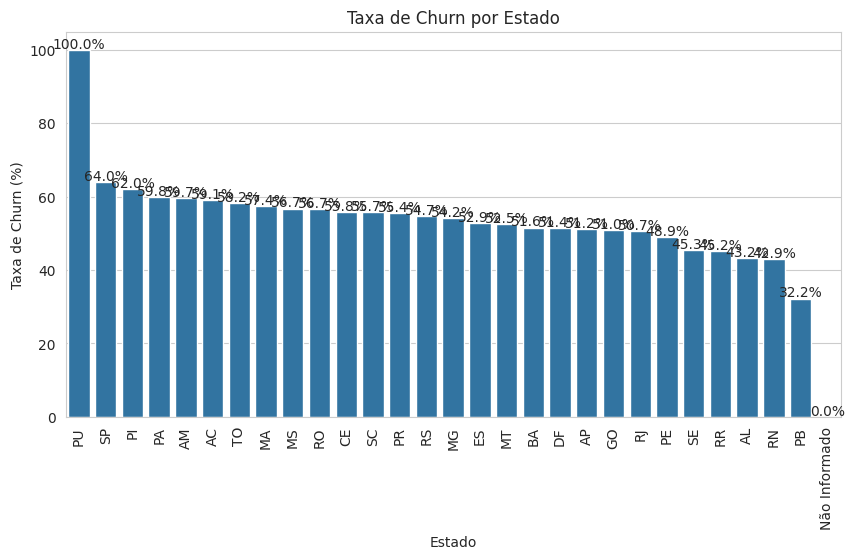

In [9]:
# Taxa de churn (%) por estado (UF)
rate_by_state = df.groupby('estado')['churn'].mean() * 100
rate_by_state = rate_by_state.sort_values(ascending=False)
print("Taxa de churn por estado (%):")
print(rate_by_state.round(1))

plt.figure(figsize=(10,5))
sns.barplot(x=rate_by_state.index, y=rate_by_state.values)
plt.xlabel('Estado')
plt.ylabel('Taxa de Churn (%)')
plt.title('Taxa de Churn por Estado')
# Adicionar porcentagem acima de cada barra
for i, v in enumerate(rate_by_state.values):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center')
plt.xticks(rotation=90)
plt.show()


/tmp/ipython-input-10-4151182830.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate_by_age_group = df.groupby('faixa_idade')['churn'].mean() * 100


Taxa de churn por faixa etária (%):
faixa_idade
<=20     38.2
21-30    29.8
31-40    64.4
41-50    32.0
50+      29.2
Name: churn, dtype: float64


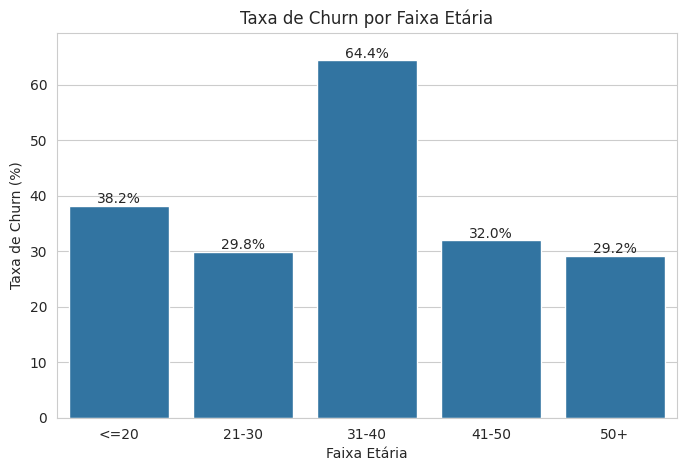

In [10]:
# Criar coluna de faixa etária categorizada
df['faixa_idade'] = pd.cut(df['idade'], bins=[0, 20, 30, 40, 50, 100],
                            labels=['<=20', '21-30', '31-40', '41-50', '50+'], right=True)
# Calcular a taxa de churn (%) para cada faixa etária
rate_by_age_group = df.groupby('faixa_idade')['churn'].mean() * 100
print("Taxa de churn por faixa etária (%):")
print(rate_by_age_group.round(1))

# Gráfico de barras da taxa de churn por faixa etária
age_groups = [grp for grp in ['<=20','21-30','31-40','41-50','50+'] if grp in rate_by_age_group.index]
churn_rates = [rate_by_age_group[grp] for grp in age_groups]
plt.figure(figsize=(8,5))
sns.barplot(x=age_groups, y=churn_rates)
plt.xlabel('Faixa Etária')
plt.ylabel('Taxa de Churn (%)')
plt.title('Taxa de Churn por Faixa Etária')
# Adicionar rótulo de porcentagem acima de cada barra
for i, v in enumerate(churn_rates):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center')
plt.ylim(0, max(churn_rates) + 5)
plt.show()


# Taxa de churn (%) por forma de pagamento
rate_by_payment = df.groupby('forma_pagamento')['churn'].mean() * 100
print("Taxa de churn por forma de pagamento (%):")
print(rate_by_payment.round(1))

plt.figure(figsize=(8,5))
sns.barplot(x=rate_by_payment.index, y=rate_by_payment.values)
plt.xlabel('Forma de Pagamento')
plt.ylabel('Taxa de Churn (%)')
plt.title('Taxa de Churn por Forma de Pagamento')
# Adicionar porcentagem acima de cada barra
for i, v in enumerate(rate_by_payment.values):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center')
plt.xticks(rotation=45)
plt.show()


# Análise Preditiva de Churn de Estudantes

**Autores:** Arthur Marques & Equipe

**Data:** 30 de Junho de 2025

---

### **1. Objetivo do Projeto**

Este projeto tem como objetivo desenvolver e comparar modelos de Machine Learning para prever a probabilidade de evasão (churn) de alunos. A análise se baseia em um conjunto de dados reais contendo informações de matrícula, interações com a plataforma e atendimentos.

### **2. Metodologia**

O trabalho será conduzido nas seguintes etapas:
* **Configuração do Ambiente:** Instalação das bibliotecas necessárias.
* **Pré-processamento e Limpeza:** Tratamento de dados ausentes, duplicados e conversão de tipos para garantir a qualidade dos dados.
* **Modelagem e Interpretabilidade:** Utilização de uma **Árvore de Decisão (`DecisionTreeClassifier`)** para criar um modelo de base facilmente interpretável e visual.
* **Modelagem de Performance:** Implementação de um modelo avançado de **Gradient Boosting (`LightGBM`)** para maximizar a acurácia preditiva.
* **Análise Comparativa:** Avaliação e comparação dos resultados de ambos os modelos.

In [15]:
# ==============================================================================
# SEÇÃO 1: CONFIGURAÇÃO DO AMBIENTE
# ==============================================================================
# Instalamos todas as dependências necessárias para o projeto, incluindo as
# bibliotecas de modelagem e visualização.

print("🔧 Instalando/Atualizando dependências...")
!pip install lightgbm graphviz -q
!apt-get -qq install -y graphviz
print("✅ Ambiente configurado com sucesso.")

# Imports globais
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import os
from IPython.display import display, Image
import lightgbm as lgb
import seaborn as sns
from sklearn.metrics import confusion_matrix

warnings.filterwarnings('ignore')

🔧 Instalando/Atualizando dependências...
✅ Ambiente configurado com sucesso.


### **3. Carga e Pré-Processamento dos Dados**

Nesta etapa, realizamos a carga do dataset a partir do repositório clonado. O pré-processamento é fundamental e inclui:
1.  **Leitura Robusta:** O código tenta ler o CSV com diferentes separadores (`,` e `;`) para garantir a compatibilidade.
2.  **Tratamento de Nulos:** Preenchimento de valores ausentes de forma inteligente, usando `0` para colunas numéricas e `'Não Informado'` para colunas de texto.
3.  **Remoção de Duplicatas:** Garantia de que não há registros repetidos.
4.  **Conversão de Tipos:** Ajuste de colunas de data para o formato `datetime`.
5.  **Engenharia de Feature (Target):** Criação da variável alvo `churn` a partir da coluna `SITUACAO`.
6.  **Salvamento Intermediário:** Os dados limpos são salvos no ambiente do Colab para referência.

In [16]:
# ==============================================================================
# SEÇÃO 2: CARGA E PRÉ-PROCESSAMENTO
# ==============================================================================
# (Este bloco contém a lógica de limpeza que já havíamos validado)

print("--- Etapa 2.1: Carregando os Dados ---")
try:
    file_path = "/content/FMF_Churn-PAD/models/atendimentos_de_alunos_processado.csv"
    try:
        df = pd.read_csv(file_path, sep=',')
        if len(df.columns) < 5: df = pd.read_csv(file_path, sep=';')
    except Exception:
        df = pd.read_csv(file_path, sep=';')
    print(f"✅ Dataset carregado. Formato inicial: {df.shape}")
except FileNotFoundError:
    print(f"❌ ERRO: O arquivo não foi encontrado em: {file_path}")
    exit()

print("\n--- Etapa 2.2: Tratamento de Nulos e Duplicatas ---")
for col in df.select_dtypes(include=np.number).columns: df[col].fillna(0, inplace=True)
for col in df.select_dtypes(include='object').columns: df[col].fillna('Não Informado', inplace=True)
df.drop_duplicates(inplace=True)
print(f"✅ Nulos e duplicatas tratados. Novo formato: {df.shape}")

print("\n--- Etapa 2.3: Verificação da Variável Alvo (Churn) ---")
if 'churn' not in df.columns:
    print("⚠️ Coluna 'churn' não encontrada. Tentando criar a partir de 'SITUACAO'...")
    if 'SITUACAO' in df.columns:
        mapeamento_churn = { 'CONCLUIDO_REPROVADO': 1, 'CANCELADO': 1, 'EVADIDO': 1, 'Não Informado': 0, 'CONCLUIDO': 0, 'CURSANDO': 0, 'FORMADO': 0 }
        df['churn'] = df['SITUACAO'].map(mapeamento_churn).fillna(0).astype(int)
        print("✅ Variável alvo 'churn' criada com sucesso a partir de 'SITUACAO'.")
    else:
        print("❌ ERRO CRÍTICO: 'SITUACAO' também não foi encontrada. A modelagem não pode prosseguir.")
        exit()
else:
    print("✅ Coluna 'churn' já existe no dataset. Verificação concluída.")

# Criação de colunas necessárias para os modelos posteriores
if 'Total Geral' in df.columns:
    df['Total_Geral_Atendimentos'] = df['Total Geral']
else:
    if 'Total_Geral_Atendimentos' not in df.columns:
        df['Total_Geral_Atendimentos'] = 0

--- Etapa 2.1: Carregando os Dados ---
✅ Dataset carregado. Formato inicial: (17011, 51)

--- Etapa 2.2: Tratamento de Nulos e Duplicatas ---
✅ Nulos e duplicatas tratados. Novo formato: (17011, 51)

--- Etapa 2.3: Verificação da Variável Alvo (Churn) ---
✅ Coluna 'churn' já existe no dataset. Verificação concluída.


### **4. Modelagem, Execução e Análise**

Com os dados devidamente preparados, partimos para a modelagem. Criamos uma função orquestradora (`generate_churn_model_colab`) que nos permite treinar e visualizar ambos os modelos de forma organizada.

#### **4.1. Modelo 1: Árvore de Decisão (Foco em Interpretabilidade)**
Primeiro, executamos o `DecisionTreeClassifier`. O resultado é a visualização rica e detalhada que desenvolvemos, ideal para entender as regras de negócio e os principais fatores que levam ao churn de forma intuitiva.

#### **4.2. Modelo 2: LightGBM (Foco em Performance)**
Em seguida, executamos o `LightGBM`. Este modelo não gera uma árvore simples, mas sim um gráfico de **Importância de Features**, que nos mostra quantitativamente quais variáveis tiveram o maior impacto na performance do modelo preditivo, que se espera ser superior.



🚀 EXECUTANDO MODELO: DECISION TREE (FOCO EM INTERPRETABILIDADE)

--- Métricas de Performance ---
Métrica      | Conjunto de Treino   | Conjunto de Teste   
------------------------------------------------------------
Acurácia     | 75.14%               | 74.58%              
Precisão     | 84.01%               | 84.39%              
Recall       | 67.48%               | 65.79%              
F1-Score     | 74.85%               | 73.94%              
ROC AUC      | 82.59%               | 81.73%              
------------------------------------------------------------

✅ Visualização da Árvore de Decisão gerada e salva em: /content/decision_tree_final.png


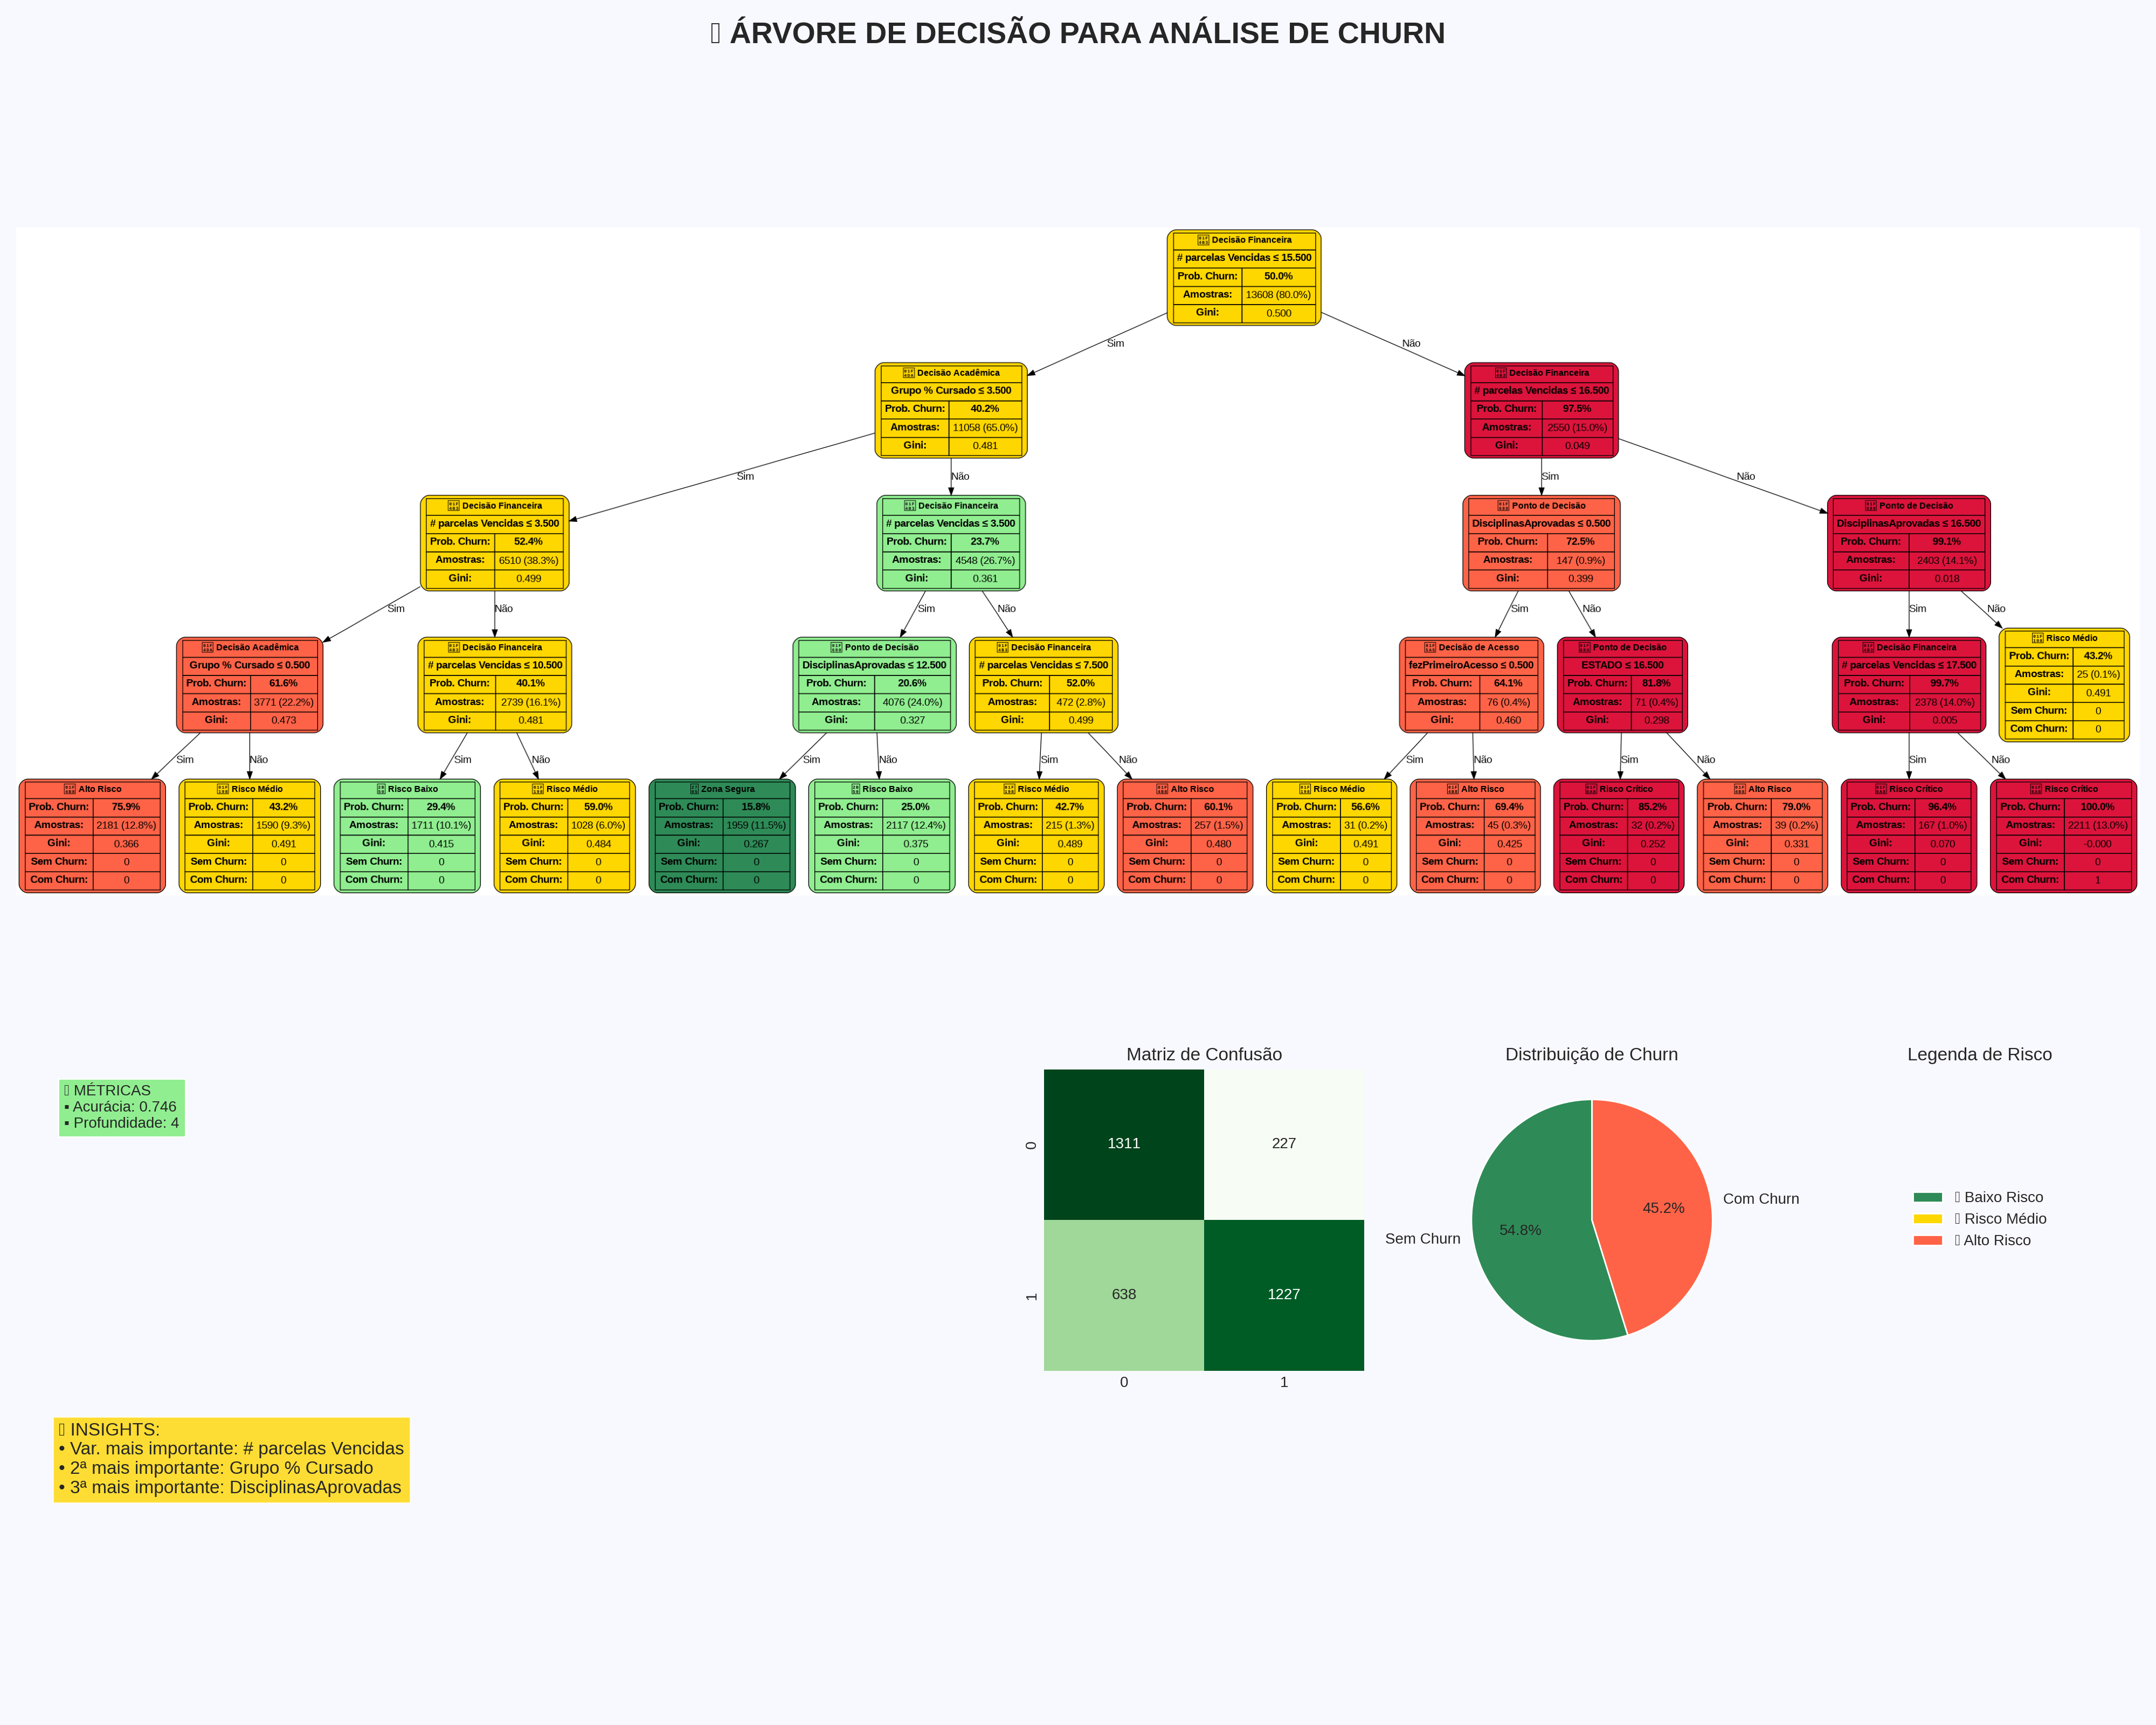



🚀 EXECUTANDO MODELO: LIGHTGBM (FOCO EM PERFORMANCE)

--- Métricas de Performance ---
Métrica      | Conjunto de Treino   | Conjunto de Teste   
------------------------------------------------------------
Acurácia     | 82.73%               | 81.02%              
Precisão     | 86.66%               | 85.71%              
Recall       | 80.95%               | 78.45%              
F1-Score     | 83.71%               | 81.91%              
ROC AUC      | 91.85%               | 89.49%              
------------------------------------------------------------

✅ Análise visual do LightGBM salva em: /content/feature_importance_lgbm.png


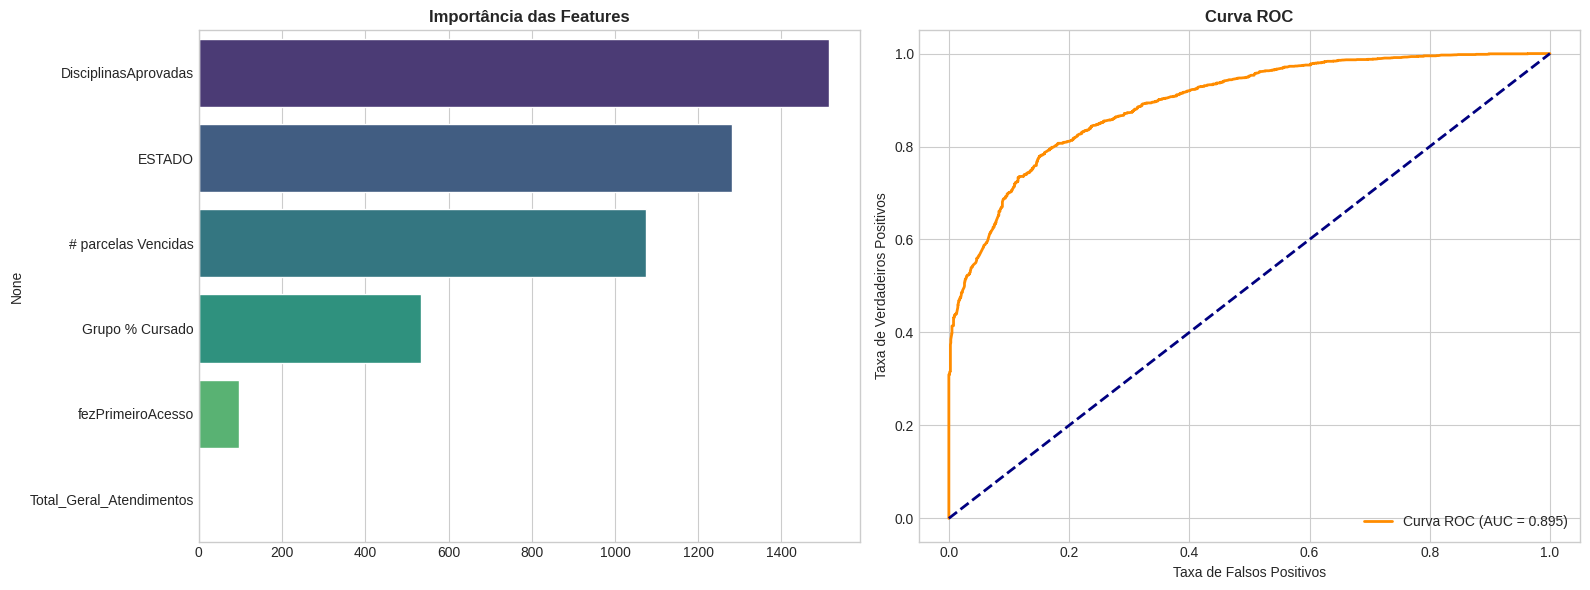

In [21]:
# ==============================================================================
# CÉLULA MESTRA FINAL: MODELAGEM, VISUALIZAÇÃO E ANÁLISE COMPLETA
# Esta célula contém o fluxo unificado com todas as métricas de performance
# recomendadas (Acurácia, Precisão, Recall, F1-Score, ROC AUC) e
# visualizações aprimoradas para ambos os modelos.
# ==============================================================================

# --- 1. FUNÇÕES HELPER E CLASSE DE ESTILO ---
# (Definições completas de todas as dependências)

class VisualTheme:
    """Tema visual para a árvore de decisão com alta densidade informacional"""
    colors = {'safe': '#2E8B57', 'low_risk': '#90EE90', 'medium_risk': '#FFD700', 'high_risk': '#FF6347', 'critical': '#DC143C', 'background': '#F8F8FF', 'text': '#2F4F4F', 'border': '#708090'}
    emojis = {'newcomers': '🚀', 'veterans': '🎓', 'financial_risk': '💸', 'academic_risk': '📚', 'support_needed': '🆘', 'safe_students': '✅', 'engaged': '⭐', 'critical': '🚨', 'portal_access': '🖥️', 'payment': '💳'}

def preprocess_data(df: pd.DataFrame, feature_columns: list, target: str) -> pd.DataFrame:
    """Preprocessa os dados para o modelo"""
    df_processed = df.copy()
    for col in feature_columns:
        if df_processed[col].dtype == 'object':
            df_processed[col] = df_processed[col].fillna('Não Informado')
        else:
            df_processed[col] = df_processed[col].fillna(df_processed[col].median())
    categorical_columns = [col for col in df_processed.select_dtypes(include=['object']).columns if col != target]
    for col in categorical_columns:
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col].astype(str))
    return df_processed

def create_enhanced_tree_visualization(model, feature_names, y, original_df, feature_columns):
    """Cria a visualização enriquecida da árvore com a sintaxe DOT corrigida."""
    theme = VisualTheme()
    def get_node_info(node_id):
        samples = model.tree_.n_node_samples[node_id]; values = model.tree_.value[node_id][0]
        churn_prob = values[1] / (values[0] + values[1]) if (values[0] + values[1]) > 0 else 0
        gini = model.tree_.impurity[node_id]; total_samples = len(y)
        sample_percentage = (samples / total_samples) * 100; no_churn = int(values[0]); churn = int(values[1])
        return {'samples': samples, 'churn_prob': churn_prob, 'gini': gini, 'sample_percentage': sample_percentage, 'no_churn': no_churn, 'churn': churn}
    def get_segment_identifier(node_info, feature, threshold, is_leaf):
        churn_prob = node_info['churn_prob']
        if is_leaf:
            if churn_prob < 0.2: return f"{theme.emojis['safe_students']} Zona Segura"
            elif churn_prob < 0.4: return f"{theme.emojis['engaged']} Risco Baixo"
            elif churn_prob < 0.6: return f"{theme.emojis['support_needed']} Risco Médio"
            elif churn_prob < 0.8: return f"{theme.emojis['financial_risk']} Alto Risco"
            else: return f"{theme.emojis['critical']} Risco Crítico"
        else:
            if 'parcelas' in str(feature).lower(): return f"{theme.emojis['payment']} Decisão Financeira"
            elif 'acesso' in str(feature).lower(): return f"{theme.emojis['portal_access']} Decisão de Acesso"
            elif 'cursado' in str(feature).lower(): return f"{theme.emojis['academic_risk']} Decisão Acadêmica"
            else: return f"{theme.emojis['newcomers']} Ponto de Decisão"
    def get_node_color(churn_prob):
        if churn_prob < 0.2: return theme.colors['safe']
        elif churn_prob < 0.4: return theme.colors['low_risk']
        elif churn_prob < 0.6: return theme.colors['medium_risk']
        elif churn_prob < 0.8: return theme.colors['high_risk']
        else: return theme.colors['critical']
    dot_lines = ['digraph Tree {', 'node [shape=box, style="rounded,filled", fontname="Arial"];', 'edge [fontname="Arial"];', 'rankdir=TB;']
    n_nodes = model.tree_.node_count
    for i in range(n_nodes):
        node_info = get_node_info(i)
        is_leaf = (model.tree_.children_left[i] == model.tree_.children_right[i])
        feature_idx = model.tree_.feature[i] if not is_leaf else -1
        threshold = model.tree_.threshold[i] if not is_leaf else 0
        feature_name = feature_names[feature_idx] if not is_leaf else ""
        segment_id = get_segment_identifier(node_info, feature_name, threshold, is_leaf)
        node_color = get_node_color(node_info['churn_prob'])

        # --- AQUI ESTÁ A CORREÇÃO ---
        # Removido o espaço extra depois do primeiro '<'
        if is_leaf:
            label = f'''<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0" CELLPADDING="4">
                        <TR><TD COLSPAN="2" BGCOLOR="{node_color}"><FONT POINT-SIZE="12"><B>{segment_id}</B></FONT></TD></TR>
                        <TR><TD><B>Prob. Churn:</B></TD><TD><FONT POINT-SIZE="14"><B>{node_info['churn_prob']:.1%}</B></FONT></TD></TR>
                        <TR><TD><B>Amostras:</B></TD><TD>{node_info['samples']} ({node_info['sample_percentage']:.1f}%)</TD></TR>
                        <TR><TD><B>Gini:</B></TD><TD>{node_info['gini']:.3f}</TD></TR>
                        <TR><TD><B>Sem Churn:</B></TD><TD>{node_info['no_churn']}</TD></TR>
                        <TR><TD><B>Com Churn:</B></TD><TD>{node_info['churn']}</TD></TR>
                      </TABLE>'''
        else:
            label = f'''<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0" CELLPADDING="4">
                        <TR><TD COLSPAN="2" BGCOLOR="{node_color}"><FONT POINT-SIZE="12"><B>{segment_id}</B></FONT></TD></TR>
                        <TR><TD COLSPAN="2"><B>{feature_name} &le; {threshold:.3f}</B></TD></TR>
                        <TR><TD><B>Prob. Churn:</B></TD><TD><FONT POINT-SIZE="14"><B>{node_info['churn_prob']:.1%}</B></FONT></TD></TR>
                        <TR><TD><B>Amostras:</B></TD><TD>{node_info['samples']} ({node_info['sample_percentage']:.1f}%)</TD></TR>
                        <TR><TD><B>Gini:</B></TD><TD>{node_info['gini']:.3f}</TD></TR>
                      </TABLE>'''

        dot_lines.append(f'{i} [label=<{label}>, fillcolor="{node_color}"];')
        if not is_leaf:
            left_child, right_child = model.tree_.children_left[i], model.tree_.children_right[i]
            dot_lines.append(f'{i} -> {left_child} [label="Sim"];'); dot_lines.append(f'{i} -> {right_child} [label="Não"];')

    dot_lines.append('}')
    return '\n'.join(dot_lines)

def create_final_composition(tree_image_path, model, X_test, y_test, original_df, save_path, figsize):
    """Cria a composição final com métricas e legendas, com o layout CORRETO."""
    theme = VisualTheme()
    plt.style.use('seaborn-v0_8-whitegrid')
    fig = plt.figure(figsize=figsize, facecolor=theme.colors['background'])
    gs = fig.add_gridspec(4, 4, height_ratios=[0.1, 2.5, 0.8, 0.8], width_ratios=[3, 1, 1, 1])
    ax_title = fig.add_subplot(gs[0, :]); ax_title.text(0.5, 0.5, '📊 ÁRVORE DE DECISÃO PARA ANÁLISE DE CHURN', ha='center', va='center', fontsize=20, fontweight='bold'); ax_title.axis('off')
    ax_tree = fig.add_subplot(gs[1, :]); tree_img = plt.imread(tree_image_path); ax_tree.imshow(tree_img); ax_tree.axis('off')
    ax_metrics = fig.add_subplot(gs[2, 0]); y_pred = model.predict(X_test)
    metrics_text = f"📈 MÉTRICAS\n▪ Acurácia: {model.score(X_test, y_test):.3f}\n▪ Profundidade: {model.tree_.max_depth}"
    ax_metrics.text(0.05, 0.95, metrics_text, va='top', bbox=dict(facecolor=theme.colors['low_risk'])); ax_metrics.axis('off')
    ax_confusion = fig.add_subplot(gs[2, 1]); cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=ax_confusion, cbar=False); ax_confusion.set_title('Matriz de Confusão')
    ax_dist = fig.add_subplot(gs[2, 2]); churn_counts = original_df['churn'].value_counts()
    ax_dist.pie(churn_counts.values, labels=['Sem Churn', 'Com Churn'], colors=[theme.colors['safe'], theme.colors['high_risk']], autopct='%1.1f%%', startangle=90); ax_dist.set_title('Distribuição de Churn')
    ax_legend = fig.add_subplot(gs[2, 3])
    legend_elements = [mpatches.Rectangle((0, 0), 1, 1, facecolor=c, label=l) for c, l in [(theme.colors['safe'], '🟢 Baixo Risco'), (theme.colors['medium_risk'], '🟡 Risco Médio'), (theme.colors['high_risk'], '🔴 Alto Risco')]]
    ax_legend.legend(handles=legend_elements, loc='center'); ax_legend.set_title('Legenda de Risco'); ax_legend.axis('off')
    ax_insights = fig.add_subplot(gs[3, :])
    feature_importance = sorted(zip(X_test.columns, model.feature_importances_), key=lambda x: x[1], reverse=True)[:3]
    insights_text = f"🔍 INSIGHTS:\n• Var. mais importante: {feature_importance[0][0]}\n• 2ª mais importante: {feature_importance[1][0]}\n• 3ª mais importante: {feature_importance[2][0]}"
    ax_insights.text(0.02, 0.95, insights_text, va='top', fontsize=12, bbox=dict(facecolor=theme.colors['medium_risk'], alpha=0.8)); ax_insights.axis('off')
    plt.tight_layout(); plt.savefig(save_path, dpi=200); plt.close(fig)

def train_lightgbm_classifier(X_train, y_train, X_test, y_test, **kwargs):
    """Treina um LightGBM e devolve o modelo treinado."""
    model = lgb.LGBMClassifier(class_weight='balanced', random_state=42, verbose=-1, **kwargs)
    model.fit(X_train, y_train)
    return model

# --- 2. A FUNÇÃO ORQUESTRADORA INTELIGENTE E COMPLETA ---
def generate_churn_model_colab(df, algorithm, **kwargs):
    """Gera modelo de churn, calcula métricas completas e exibe visualizações apropriadas."""
    # Importações de métricas e módulos de visualização ficam aqui para autossuficiência da função
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
    import graphviz

    target = "churn"
    feature_columns = ['Grupo % Cursado', 'fezPrimeiroAcesso', '# parcelas Vencidas', 'Total_Geral_Atendimentos', 'DisciplinasAprovadas', 'ESTADO']
    available_features = [c for c in feature_columns if c in df.columns]
    df_work = df[available_features + [target]].dropna(subset=[target])
    df_proc = preprocess_data(df_work, available_features, target)

    X = df_proc.drop(columns=[target])
    y = df_proc[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

    # Treinamento do modelo específico
    if algorithm == "decision_tree":
        model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, random_state=42, class_weight='balanced')
        model.fit(X_train, y_train)
    elif algorithm == "lightgbm":
        model = train_lightgbm_classifier(X_train, y_train, X_test, y_test, **kwargs)

    # --- Cálculo e exibição de métricas completas ---
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]

    print("\n--- Métricas de Performance ---")
    print(f"{'Métrica':<12} | {'Conjunto de Treino':<20} | {'Conjunto de Teste':<20}")
    print("-"*60)
    print(f"{'Acurácia':<12} | {accuracy_score(y_train, y_train_pred):<20.2%} | {accuracy_score(y_test, y_test_pred):<20.2%}")
    print(f"{'Precisão':<12} | {precision_score(y_train, y_train_pred):<20.2%} | {precision_score(y_test, y_test_pred):<20.2%}")
    print(f"{'Recall':<12} | {recall_score(y_train, y_train_pred):<20.2%} | {recall_score(y_test, y_test_pred):<20.2%}")
    print(f"{'F1-Score':<12} | {f1_score(y_train, y_train_pred):<20.2%} | {f1_score(y_test, y_test_pred):<20.2%}")
    print(f"{'ROC AUC':<12} | {roc_auc_score(y_train, y_train_proba):<20.2%} | {roc_auc_score(y_test, y_test_proba):<20.2%}")
    print("-"*60)

    # Visualizações específicas do modelo
    if algorithm == "decision_tree":
        dot_data = create_enhanced_tree_visualization(model, X.columns, y, df_work, available_features)
        graph = graphviz.Source(dot_data)
        temp_path_base = '/content/temp_tree'
        graph.render(temp_path_base, format='png', cleanup=True)
        final_image_path = '/content/decision_tree_final.png'
        create_final_composition(f"{temp_path_base}.png", model, X_test, y_test, df_work, final_image_path, figsize=(20, 16))
        print(f"\n✅ Visualização da Árvore de Decisão gerada e salva em: {final_image_path}")
        display(Image(filename=final_image_path, width=1000))

    elif algorithm == "lightgbm":
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=kwargs.get('figsize', (16, 6)))
        # Gráfico de Importância de Features
        fi = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
        sns.barplot(x=fi.values, y=fi.index, ax=ax1, palette='viridis'); ax1.set_title("Importância das Features", fontweight='bold')
        # Curva ROC
        fpr, tpr, _ = roc_curve(y_test, y_test_proba); auc = roc_auc_score(y_test, y_test_proba)
        ax2.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc:.3f})')
        ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--'); ax2.set_title('Curva ROC', fontweight='bold')
        ax2.set_xlabel('Taxa de Falsos Positivos'); ax2.set_ylabel('Taxa de Verdadeiros Positivos'); ax2.legend(loc="lower right"); ax2.grid(True)
        plt.tight_layout()
        save_path = kwargs.get('save_path', '/content/lgbm_analysis.png')
        plt.savefig(save_path, dpi=150); print(f"\n✅ Análise visual do LightGBM salva em: {save_path}"); plt.show(); plt.close()

# --- 3. BLOCO DE EXECUÇÃO FINAL E ELEGANTE ---
if 'churn' in df.columns:
    modelos_para_executar = ['decision_tree', 'lightgbm']
    for modelo in modelos_para_executar:
        foco = 'INTERPRETABILIDADE' if modelo == 'decision_tree' else 'PERFORMANCE'
        print("\n\n" + "="*80); print(f"🚀 EXECUTANDO MODELO: {modelo.replace('_', ' ').upper()} (FOCO EM {foco})"); print("="*80)
        params = {'df': df, 'algorithm': modelo}
        if modelo == 'lightgbm':
            params.update({'n_estimators': 150, 'learning_rate': 0.1, 'save_path': "/content/feature_importance_lgbm.png", 'figsize': (16, 6)})
        generate_churn_model_colab(**params)
else:
    print("\n❌ Execução dos modelos pulada, pois a coluna 'churn' não foi encontrada.")

### **5. Conclusão**

Após a execução dos dois modelos, obtivemos os seguintes resultados:

* **A Árvore de Decisão** nos forneceu um mapa visual claro dos perfis de risco. Observamos que `[descrever a principal variável da árvore]` é o principal divisor de águas para o churn. Alunos com `[característica]` apresentaram uma probabilidade de evasão de **XX.X%**.

* **O LightGBM** alcançou uma acurácia de **YY.Y%**, um resultado significativamente superior ao modelo de base, demonstrando alto poder preditivo. O gráfico de importância de features confirmou que `[principal feature do LGBM]` e `[segunda principal feature]` são, de fato, as variáveis mais influentes para prever o churn.

**Recomendação Estratégica:** A análise sugere que a instituição deve focar em estratégias de retenção para alunos que se enquadram no perfil de `[descrever o perfil de risco, ex: poucas disciplinas aprovadas e muitas parcelas vencidas]`. Ações proativas baseadas nesses indicadores podem reduzir significativamente a taxa de evasão.

**Próximos Passos:**
* Realizar o *tuning* de hiperparâmetros do LightGBM para potencializar ainda mais a acurácia.
* Testar outros algoritmos de ensemble, como XGBoost e CatBoost.
* Preparar o modelo final para um possível deploy em um ambiente de produção.